In [1]:
# instala o transformers
!pip install transformers

In [2]:
#Instalando Biblioteca Spacy e seus componentes para normalização dos dados
!pip install spacy

In [3]:
!python -m spacy download pt_core_news_sm


     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     --------------------------------------- 0.0/13.0 MB 330.3 kB/s eta 0:00:40
     --------------------------------------- 0.1/13.0 MB 991.0 kB/s eta 0:00:14
      --------------------------------------- 0.3/13.0 MB 2.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/13.0 MB 4.5 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/13.0 MB 7.1 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/13.0 MB 9.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/13.0 MB 11.8 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/13.0 MB 13.9 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/13.0 MB 13.0 MB/s eta 0:00:01
     ------------------- -------------------- 6.4/13.0 MB 14.6 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/13.0 MB 15.7 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/13

In [4]:
import pandas as pd

In [5]:
# Lendo csv criado e importando apenas uma fração dele para teste

tripadvisor_data = pd.read_csv('https://raw.githubusercontent.com/isalbineli/testes/main/BASE_TREINO_LISTA.csv',sep = ',')

df = tripadvisor_data.sample(frac=0.05).reset_index(drop=True)

df.head()

,review_text,ambiente,comida,geral,preco,servico,seguranca
0,revela a paisagem urbana em sua simplicidade.,1,2,1,2,2,2
1,"Atendimento muito bom, rápido e o responsavel ...",2,2,2,2,1,2
2,Preço acessível aos que trabalham no polo indu...,2,2,2,1,2,2
3,"Amei, ótimo ambiente para confraternizações!",1,2,2,2,2,2
4,"Restaurante muito bom,excelente pra se degusta...",2,1,1,2,2,2


#Realizando a normalização dos dados

In [6]:
import re
import nltk
import numpy as np
import pandas as pd
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# Converter todas a letras para minúsculas
df['review_text'] = df['review_text'].str.lower()

# Remover espaços extras
df['review_text'] = df['review_text'].apply(lambda x: x.strip())


#Conferindo a base

In [7]:
df.head()

,review_text,ambiente,comida,geral,preco,servico,seguranca
0,revela a paisagem urbana em sua simplicidade.,1,2,1,2,2,2
1,"atendimento muito bom, rápido e o responsavel ...",2,2,2,2,1,2
2,preço acessível aos que trabalham no polo indu...,2,2,2,1,2,2
3,"amei, ótimo ambiente para confraternizações!",1,2,2,2,2,2
4,"restaurante muito bom,excelente pra se degusta...",2,1,1,2,2,2


#Conferindo tamanho da base

In [8]:
df.shape

(222, 7)

#Definindo a aleatoriedade para a seleção de dados de treinamento, teste e validação

In [11]:
import random  # Importa a biblioteca random para geração de números aleatórios
import numpy as np  # Importa a biblioteca numpy para trabalhar com matrizes numéricas

# Define a semente para reprodutibilidade
seed = 123
np.random.seed(seed)

#Conferindo a quantidade de cada label (negativo, positivo e neutro)

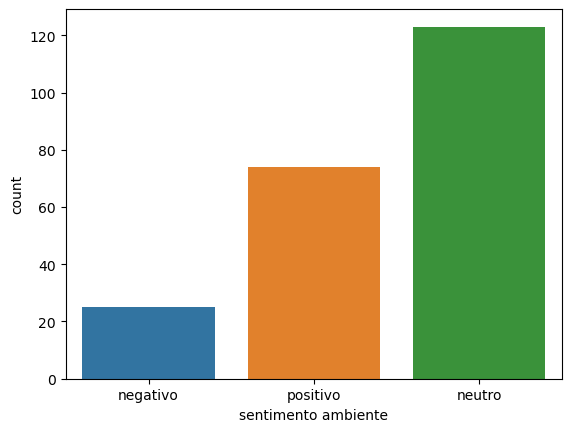

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.countplot(x=df["ambiente"])
class_names = ['negativo', 'positivo', 'neutro']
plt.xlabel('sentimento ambiente')
ax.set_xticklabels(class_names);

#Separando dados para treinamento, teste e validação

In [13]:
from sklearn.model_selection import train_test_split  # Importa a função train_test_split do scikit-learn para dividir os dados em treinamento e teste



#partição dos dados
train_text, test_text, train_labels, test_labels = train_test_split(df['review_text'], df['ambiente'],
                                                                    random_state=42,
                                                                    test_size=0.3,
                                                                    stratify= df['ambiente']
                                                                    )



#Conferindo tamanho das sentenças e definindo tamanho do truncate

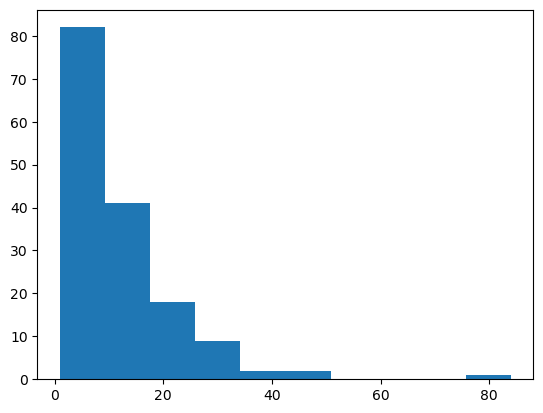

In [14]:
train_lens = [len(i.split()) for i in train_text]
plt.hist(train_lens)
plt.show()

In [15]:
pad_len = 50

#Definindo Modelo BERT a ser usado

In [16]:
#!pip install torch

In [17]:
!pip install torch torchvision torchaudio


In [18]:
import torch # Importa a biblioteca PyTorch para treinar modelos de deep learning
print(torch.__version__) # confere a versao instalada


2.1.0+cpu


In [19]:
from torch import nn  # Importa o módulo nn do PyTorch para definir redes neurais

In [20]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertModel  # Importa as classes e funções relacionadas ao modelo BERT da biblioteca transformers

#tokenizador do BERTimbau

PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-large-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case=False)

#Importando Pytorch para Fine Tunning

#Gráfico de densidade de tokens


Mostra como os textos dos tweets estão distribuídos em termos de contagem de tokens

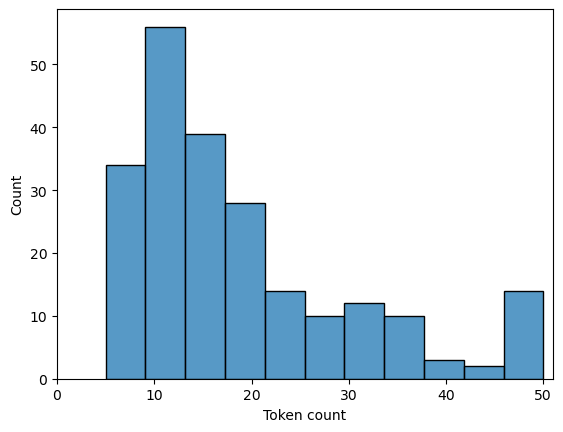

In [21]:
#Tamanho dos tokens
token_lens = []

for txt in df.review_text:
  tokens = tokenizer.encode(txt, max_length=pad_len,truncation=True)
  token_lens.append(len(tokens))

sns.histplot(token_lens)  #distplot
plt.xlim([0, pad_len+1]);
plt.xlabel('Token count');

#Configurando Tokenizador

In [22]:
#tokenizador BERT para codificar os textos de treinamento e teste



max_len=pad_len

train_encodings = tokenizer(list(train_text), truncation=True, padding=True, max_length=max_len,return_tensors="pt")

test_encodings = tokenizer(list(test_text), truncation=True, padding=True, max_length=max_len,return_tensors="pt")




#Configurando Modelo para Fine Tunning

In [23]:
# Definindo a função para calcular a acurácia
def calculate_accuracy(model, encodings, labels):
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)
        accuracy = (predicted_labels == labels).sum().item() / len(labels)
    return accuracy

In [24]:
# Inicializando o histórico de treinamento
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

In [25]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

#Inicializando o modelo e otimizador

In [26]:
# Inicializando o modelo e otimizador
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=3)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-large-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\isabe\anaconda3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#Cálculo inicial da acuracidade do modelo

In [27]:
#VALIDAÇÃO EXTRA

from sklearn.tree import DecisionTreeClassifier

X = train_encodings['attention_mask']
y = np.array(train_labels)

clf = DecisionTreeClassifier()

clf.fit(X,y)

acuracidade = clf.score(X,y)
print('Acuracidade = ', acuracidade)

y_pred = clf.predict(X)

Acuracidade =  0.6645161290322581


#Treinando o Modelo

In [ ]:
epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    print("-" * 10)

    # Treinamento
    model.train()
    labels = torch.tensor(list(train_labels))
    train_loss = model(**train_encodings, labels=labels).loss
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Cálculo da acurácia de treinamento
    train_accuracy = calculate_accuracy(model, train_encodings, labels)
    print(f"Train loss: {train_loss:.5f} accuracy: {train_accuracy:.5f}")

    # Validação
    model.eval()
    val_labels = torch.tensor(list(test_labels))
    val_loss = model(**test_encodings, labels=val_labels).loss

    # Cálculo da acurácia de validação
    val_accuracy = calculate_accuracy(model, test_encodings, val_labels)
    print(f"Val loss: {val_loss:.5f} accuracy: {val_accuracy:.5f}")
    print()

    # Atualização do histórico
    history['train_acc'].append(train_accuracy)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_accuracy)
    history['val_loss'].append(val_loss)

    # Salvando o melhor modelo com base na acurácia de validação
    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state_ambiente.bin')
        best_accuracy = val_accuracy



Epoch 1/5
----------


#Salvar o modelo com Fine Tuning no drive

In [ ]:
torch.save(model.state_dict(), 'best_model_state_ambiente.bin')

##Modelo

In [ ]:
print(model)

##Gráfico do progresso de acurácia

In [ ]:
'''

import matplotlib.pyplot as plt

# Plotando a acurácia de treinamento e validação
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Configurações do gráfico
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])

# Exibindo o gráfico
plt.show()

'''

##Matriz de Confusão

In [ ]:
'''

from sklearn.metrics import confusion_matrix

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

# Cálculo da matriz de confusão
y_pred = torch.argmax(model(**test_encodings).logits, dim=1)
cm = confusion_matrix(val_labels, y_pred)

# Exibição da matriz de confusão
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

'''